In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
% matplotlib widget
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image

UsageError: Line magic function `%` not found.


In [18]:
print(tf.__version__)

2.11.0


In [19]:
batch_size = 32
img_height = 256
img_width = 256

In [20]:
import pathlib

directory = "/home/fernblade/PycharmProjects/ml_practical/dataset-resized"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 2390 files belonging to 5 classes.
Using 1912 files for training.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

Found 2390 files belonging to 5 classes.
Using 478 files for validation.


In [22]:
class_names = train_ds.class_names
class_names

['cardboard', 'glass', 'metal', 'paper', 'plastic']

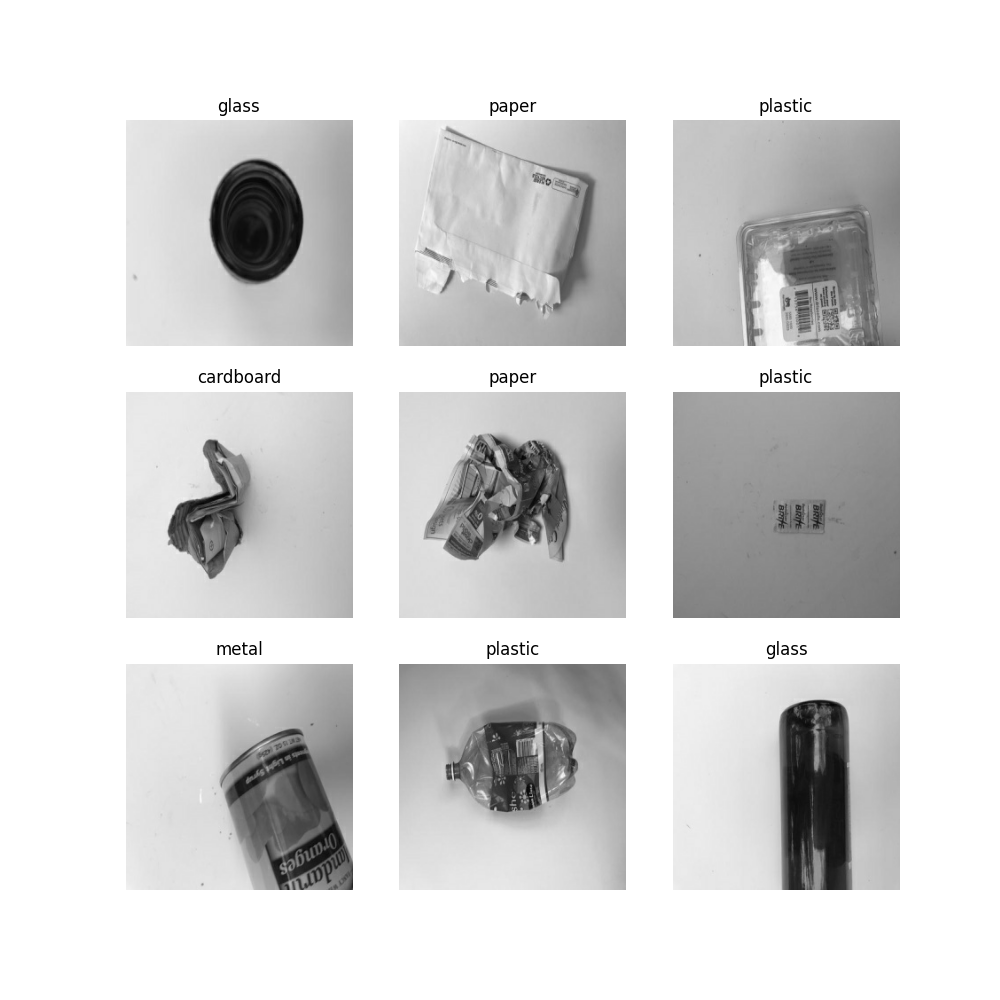

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [24]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
num_classes = 5
model = tf.keras.Sequential([
    # tf.keras.Input(shape=(256,256)),
    # tf.keras.layers.ZeroPadding2D(padding=(2,2)),
    # tf.keras.layers.Conv2D(filters=96,kernel_size=11,strides=4,padding='valid', activation='relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2),
    # tf.keras.layers.ZeroPadding2D(padding=(2,2)),
    # tf.keras.layers.Conv2D(filters=192,kernel_size=5,strides=1,padding='valid', activation='relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2),
    # tf.keras.layers.ZeroPadding2D(padding=(1,1)),
    # tf.keras.layers.Conv2D(filters=288,kernel_size=3,strides=1,padding='valid', activation='relu'),
    # tf.keras.layers.ZeroPadding2D(padding=(1,1)),
    # tf.keras.layers.Conv2D(filters=288,kernel_size=3,strides=1,padding='valid', activation='relu'),
    # tf.keras.layers.ZeroPadding2D(padding=(1,1)),
    # tf.keras.layers.Conv2D(filters=288,kernel_size=3,strides=1,padding='valid', activation='relu'),
    # tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2),
    # tf.keras.layers.Dense(4096, activation='relu'),
    # tf.keras.layers.Dense(4096, activation='relu'),
    # tf.keras.layers.Dense(5)
    tf.keras.layers.Rescaling(1. / 255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)

])

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [30]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [27]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)
!mkdir -p saved_model
model.save('saved_model/trashnet')

Epoch 1/20
60/60 [==============================] - 52s 858ms/step - loss: 1.5985 - accuracy: 0.2845 - val_loss: 1.3885 - val_accuracy: 0.4163
Epoch 2/20
60/60 [==============================] - 51s 854ms/step - loss: 1.3601 - accuracy: 0.4252 - val_loss: 1.3162 - val_accuracy: 0.4519
Epoch 3/20
60/60 [==============================] - 52s 860ms/step - loss: 1.2270 - accuracy: 0.4927 - val_loss: 1.2287 - val_accuracy: 0.5335
Epoch 4/20
60/60 [==============================] - 51s 858ms/step - loss: 1.0941 - accuracy: 0.5727 - val_loss: 1.2230 - val_accuracy: 0.5105
Epoch 5/20
60/60 [==============================] - 52s 861ms/step - loss: 0.9592 - accuracy: 0.6266 - val_loss: 1.3500 - val_accuracy: 0.4812
Epoch 6/20
60/60 [==============================] - 51s 857ms/step - loss: 0.8297 - accuracy: 0.6836 - val_loss: 1.7078 - val_accuracy: 0.4770
Epoch 7/20
60/60 [==============================] - 52s 861ms/step - loss: 0.6544 - accuracy: 0.7615 - val_loss: 1.5285 - val_accuracy: 0.5251

INFO:tensorflow:Assets written to: saved_model/trashnet/assets


INFO:tensorflow:Assets written to: saved_model/trashnet/assets


In [28]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/trashnet')
tflite_model = converter.convert()
with open('trashnet.tflite', 'wb') as f:
    f.write(tflite_model)

2023-01-24 22:33:23.693876: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-24 22:33:23.693900: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-01-24 22:33:23.694415: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: saved_model/trashnet
2023-01-24 22:33:23.695986: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-01-24 22:33:23.696003: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: saved_model/trashnet
2023-01-24 22:33:23.699787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-01-24 22:33:23.701345: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-01-24 22:33:23.764635: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: saved_model/tras

In [39]:
img = tf.keras.utils.load_img('./dataset-resized/paper/paper392.jpg')
img=tf.keras.utils.img_to_array(img)

In [43]:
img=img.reshape(-1,256,256,3)
img.shape

(1, 256, 256, 3)

In [44]:
mdl=tf.keras.models.load_model('saved_model/trashnet')
keras_prediction=model.predict(img)
print(keras_prediction)

1/1 [==============================] - 0s 96ms/step
[[  5.0671897 -26.084093  -13.757389   14.443026  -14.557361 ]]
